<a href="https://colab.research.google.com/github/alexander-toschev/mbzuai-course/blob/main/ImagePreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Key Steps in Data Pre-Processing**
1. **Handling Missing Data** - Removing or imputing missing images in datasets.
2. **Normalization** - Adjusting pixel values to a consistent range.
3. **Scaling** - Resizing images to fit model requirements.
4. **Augmentation** - Generating new images by transformations.
5. **Transformation** - Applying changes such as histogram equalization.

# Augmentation
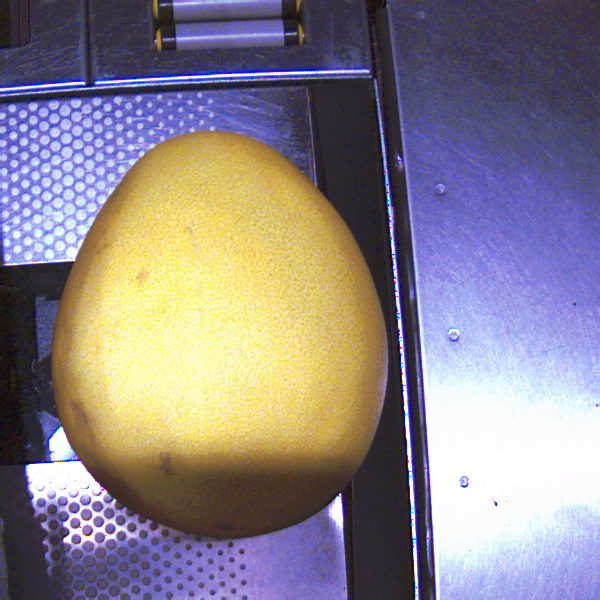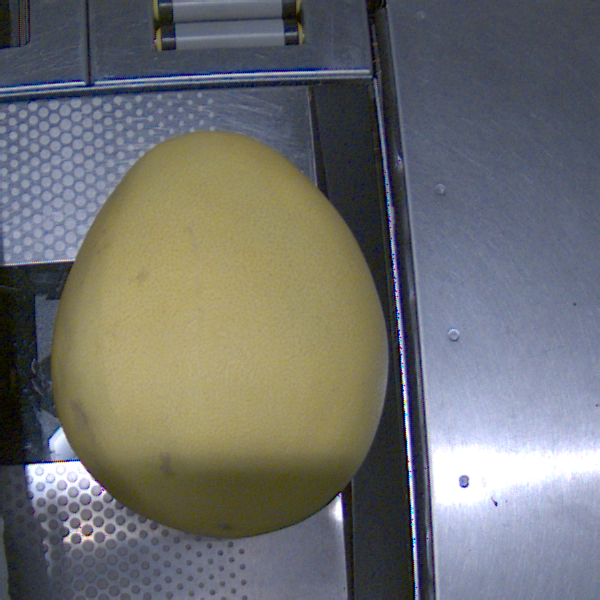

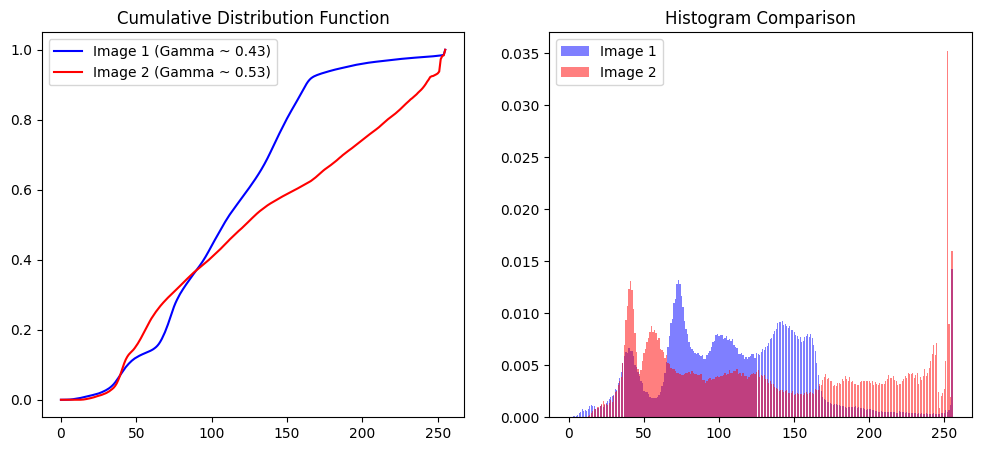

Estimated Gamma for Image 1: 0.43
Estimated Gamma for Image 2: 0.53
Gamma Difference: 0.09


In [3]:
# doing gamma comparison
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil
from skimage import exposure
from io import BytesIO

# Function to download and save images from GitHub
def download_image(url, filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            shutil.copyfileobj(response.raw, file)
    else:
        print(f"Failed to download {url}")

# URLs of the images on GitHub (Replace these with your actual image URLs)
target = "https://github.com/alexander-toschev/mbzuai-course/blob/eab24f0de3c4d52fc42535b4d02475ddb9eee55c/images/617ca5db91a0415457dd16b59e51e7cb.png?raw=true"
source = "https://github.com/alexander-toschev/mbzuai-course/blob/eab24f0de3c4d52fc42535b4d02475ddb9eee55c/images/617ca5db91a0415457dd16b59e51e7cb_augmented.png?raw=true"

# Download images
download_image(target, "target.jpg")
download_image(source, "source.jpg")

# Load images
img1 = cv2.imread("target.jpg")
img2 = cv2.imread("source.jpg")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Compute histograms
hist1, bins1 = np.histogram(gray1.flatten(), bins=256, range=[0, 256], density=True)
hist2, bins2 = np.histogram(gray2.flatten(), bins=256, range=[0, 256], density=True)

# Compute cumulative distribution function (CDF)
cdf1 = hist1.cumsum()
cdf1 = cdf1 / cdf1[-1]  # Normalize

cdf2 = hist2.cumsum()
cdf2 = cdf2 / cdf2[-1]  # Normalize

# Estimate gamma correction
gamma1 = exposure.adjust_gamma(gray1, 1.0).mean() / 255.0
gamma2 = exposure.adjust_gamma(gray2, 1.0).mean() / 255.0

gamma_difference = abs(gamma1 - gamma2)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cdf1, label=f'Image 1 (Gamma ~ {gamma1:.2f})', color='blue')
plt.plot(cdf2, label=f'Image 2 (Gamma ~ {gamma2:.2f})', color='red')
plt.legend()
plt.title("Cumulative Distribution Function")

plt.subplot(1, 2, 2)
plt.bar(range(256), hist1, alpha=0.5, label="Image 1", color='blue')
plt.bar(range(256), hist2, alpha=0.5, label="Image 2", color='red')
plt.legend()
plt.title("Histogram Comparison")

plt.show()

print(f"Estimated Gamma for Image 1: {gamma1:.2f}")
print(f"Estimated Gamma for Image 2: {gamma2:.2f}")
print(f"Gamma Difference: {gamma_difference:.2f}")
